## LAB 6: Design and Analysis of Algorithms
Name: Rudra Shah <br>
Roll Number: 21BCM054
##### Q5. Implement operations of Binomial heap.

### Important Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
import pydot
import matplotlib.pyplot as plt
nline = '\n'

In [2]:
x = [7,2,9,4,5,3,10,11,14,15,16,17]
l = len(x)
print("Length of Array: ",l)

Length of Array:  12


### Required Binomial Heap and there Size

In [3]:
a = []

while(1):
    if(l<=0):
        break
    if(l>=16):
        a.append("B4")
        l = l-16
    elif(l>=8):
        a.append("B3")
        l = l-8
    elif(l>=4):
        a.append("B2")
        l = l-4
    elif(l>=2):
        a.append("B1")
        l = l-2
    else:
        a.append("B0")
        l = l-1
print(a)

['B3', 'B2']


### Null Adjececy Matrix Creation

In [4]:
inermat = [0]*len(x)
mat = [inermat.copy() for i in range(len(x))]
elemat = []
def pmat(mat):
    print("       ",(' '*2).join([str(x[i]) for i in range(len(mat[0]))]))
    print("       ",'  '.join([str(i) for i in range(len(mat[0]))]))
    for i in range(len(mat)):
        print(x[i],' '*(3-len(str(x[i]))),i,mat[i])

### Binomial Tree Creation

In [5]:
def createB0(ele):
    mat[x.index(ele)][x.index(ele)] = 1

def createB1(arr):
    global mat
    arr = sorted(arr)
    mat[x.index(arr[0])][x.index(arr[1])] = 1

def createB2(arr):
    a1,a2 = arr[:2],arr[2:]
    r = min(a1,a2)
    a1,a2 = sorted(a1),sorted(a2)
    r = min([a1[0],a2[0]])
    if(a1[0]==r):
        createB1(a1)
        createB1(a2)
        mat[x.index(r)][x.index(a2[0])] = 1
    else:
        createB1(a2)
        createB1(a1)
        mat[x.index(r)][x.index(a1[0])] = 1

def createB3(arr):
    global rootBH
    a1,a2 = arr[:4],arr[4:]
    createB2(a1)
    createB2(a2)
    a1,a2 = sorted(a1),sorted(a2)
    r = min([a1[0],a2[0]])
    if(a1[0]==r):
        mat[x.index(r)][x.index(a2[0])] = 1
    else:
        mat[x.index(r)][x.index(a1[0])] = 1

def createB4(arr):
    global rootBH
    a1,a2 = arr[:8],arr[8:]
    a1,a2 = sorted(a1),sorted(a2)
    createB3(a1)
    createB3(a2)
    r = min([a1[0],a2[0]])
    if(a1[0]==r):
        mat[x.index(r)][x.index(a2[0])] = 1
    else:
        mat[x.index(r)][x.index(a1[0])] = 1

def findChild(mat,parent):
    child = []
    for i in range(len(mat)):
        for j in range(len(mat)):
            if(mat[i][j]==1 and x[i]==parent):
                child.append(x[j])
    return child

def getRoot(mat):
    global x
    l = []
    for i in range(len(mat)):
        for j in range(len(mat)):
            if(mat[i][j]==1):
                l.append(x[i])

    l = list(set(l))
    rl = []
    nonRootList = []
    trans = np.array(mat).T.tolist()

    for i in range(len(l)):
        for j in range(len(trans)):
            if(l[i]==x[j] and trans[j].count(1)==1 and [jk for jk in range(len(trans[0])) if(trans[j][jk]==1)][0]==x.index(l[i])):
                rl.append(l[i])
            if(l[i]==x[j] and len(set(trans[j]))==1):
                rl.append(l[i])

    return rl

def matR(mat):
    fig, ax = plt.subplots()
    ax.imshow(mat, cmap=plt.cm.Blues, interpolation='nearest')
    ax.set_xticks(np.arange(len(mat[0])))
    ax.set_yticks(np.arange(len(mat)))
    ax.set_xticklabels([str(x[i]) for i in range(len(mat[0]))])
    ax.set_yticklabels([str(x[i]) for i in range(len(mat))])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            text = ax.text(j, i, mat[i][j], ha="center", va="center", color="w")
    ax.set_title("Matrix Representation of Binomial Heap")
    fig.tight_layout()
    plt.show()

### Heap Creation

In [6]:
lasarr = 0
rootBH = []
for i in range(len(a)):
    treeType = int(a[i][1])
    cur = pow(2,treeType)
    arr = x[lasarr:cur+lasarr]
    if(treeType==0):
        createB0(arr[0])
        rootBH.append(min(arr))
    elif(treeType==1):
        createB1(arr)
        rootBH.append(min(arr))
    elif(treeType==2):
        createB2(arr)
        rootBH.append(min(arr))
    elif(treeType==3):
        createB3(arr)
        rootBH.append(min(arr))
    elif(treeType==4):
        createB4(arr)
        rootBH.append(min(arr))
    lasarr = cur+lasarr

### Adjecency matrix of binomial heap

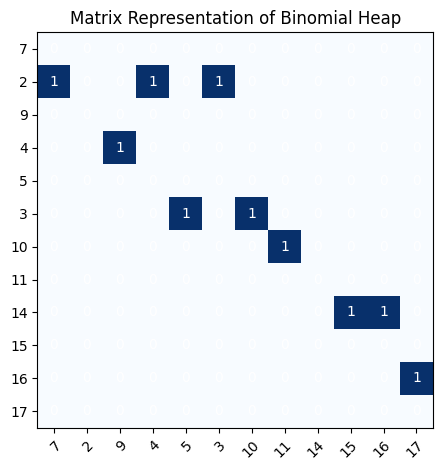

In [7]:
matR(mat)

### Find The child of given parent node

In [8]:
print(findChild(mat,2))

[7, 4, 3]


### Biniomial Heap Graphical Representation

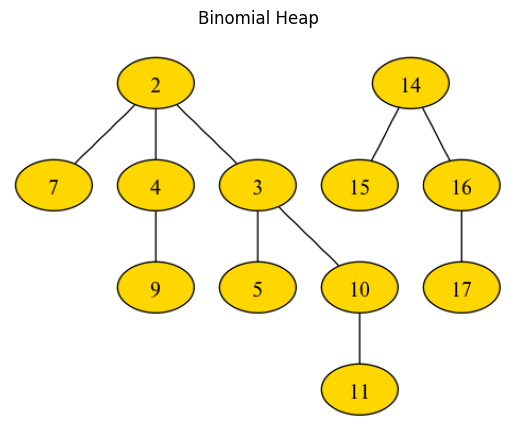

In [9]:
graph = pydot.Dot(graph_type='graph')

for i in range(len(mat)):
    for j in range(len(mat)):
        if(mat[i][j]==1):
            eg = pydot.Node(str(x[i]),style="filled", fillcolor="gold")
            graph.add_node(eg)
            eg = pydot.Node(str(x[j]),style="filled", fillcolor="gold")
            graph.add_node(eg)
            eg = pydot.Edge(str(x[i]),str(x[j]))
            graph.add_edge(eg)

graph.write_png('graph.png')
plt.imshow(plt.imread('graph.png'))
plt.title("Binomial Heap"+nline)
plt.axis('off')
plt.show()

### Minimum Element of Binomial Heap

In [10]:
minBH = min(rootBH)
print("Minimum Element in Binomial Heap is",minBH)

Minimum Element in Binomial Heap is 2


In [11]:
getRoot(mat)

[2, 14]

### Delete Minimum Element of Binomial Heap

In [12]:
def delmin(mat):
    allmap = []
    minBH = min(getRoot(mat))
    for i in range(len(mat)):
        if(x[i]==minBH):
            for j in range(len(mat)):
                if(mat[i][j]==1):
                    allmap.append(x[j])
                    mat[i][j] = 0
    for k in range(len(allmap)):
        if(len(set(mat[x.index(allmap[k])]))==1):
            mat[x.index(allmap[k])][x.index(allmap[k])] = 1
    pmat(mat)
    return mat

In [13]:
mat = delmin(mat)

        7  2  9  4  5  3  10  11  14  15  16  17
        0  1  2  3  4  5  6  7  8  9  10  11
7    0 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2    1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9    2 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4    3 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5    4 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3    5 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
10   6 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
11   7 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14   8 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
15   9 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16   10 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
17   11 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Union of Two Binomial Heap

In [24]:
alrs = getRoot(mat)
print(alrs)

rdic = {}
for i in range(len(alrs)):
    for j in range(len(mat)):
        if(x[j]==alrs[i]):
            if(mat[j].count(1)==1):
                if(x[mat[j].index(1)]!=alrs[i]):
                    rdic[alrs[i]] = x[mat[j].index(1)]
            else:
                rdic[alrs[i]] = alrs[i]


[3, 4, 7, 14]
False
True


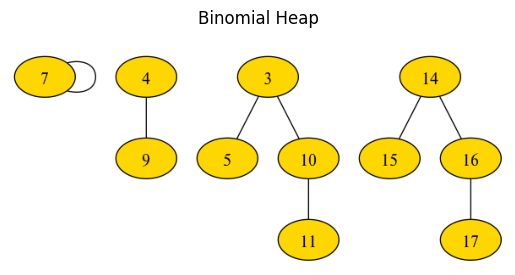

In [15]:
graph = pydot.Dot(graph_type='graph')

for i in range(len(mat)):
    for j in range(len(mat)):
        if(mat[i][j]==1):
            eg = pydot.Node(str(x[i]),style="filled", fillcolor="gold")
            graph.add_node(eg)
            eg = pydot.Node(str(x[j]),style="filled", fillcolor="gold")
            graph.add_node(eg)
            eg = pydot.Edge(str(x[i]),str(x[j]))
            graph.add_edge(eg)

graph.write_png('graph.png')
plt.imshow(plt.imread('graph.png'))
plt.title("Binomial Heap"+nline)
plt.axis('off')
plt.show()